# Optimizing Gold Recovery Efficiency with Machine Learning

## Introduction

Gold recovery is a vital process in mining, requiring efficient purification stages. This project aims to develop a machine learning model to predict gold recovery efficiency using real-world extraction data. The dataset includes training, test, and full sets, indexed by timestamps. Some parameters are missing in the test set, requiring careful handling. The project involves data preparation, feature analysis, and model training. Key steps include verifying recovery calculations, examining metal concentration changes, ensuring dataset consistency, and handling anomalies. The final model will be evaluated using sMAPE to optimize extraction efficiency and enhance process control.



In [271]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, recall_score, precision_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor


In [ ]:
train = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project10/gold_recovery_train.csv')
test = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project10/gold_recovery_test.csv')
full = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project10/gold_recovery_full.csv')

In [274]:
display(train)
display(test)
display(full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


## Data Preprocessing

In [275]:
print(train.shape)
print(test.shape)
print(full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [277]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

drop columns from train set to equal shape of test set



In [278]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [279]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [280]:
train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [281]:
test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [282]:
full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [283]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(full.duplicated().sum())

0
0
0


### Check that recovery is calculated correctly.

I'll use the training set, to calculate recovery for the `rougher.output.recovery` feature.

According to the formula,

$$Recovery = \frac{C * (F - T)}{F*(C-T)}*100%$$

* C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

Specificly, we can use this table to represent C, F, and T directly for the rougher process.

|Stage| Rougher |
|--   |  --     |
| C   |`rougher.output.concentrate_au`|
| F   |`rougher.input.feed_au` |
| T   |`rougher.output.tail_au`|

In [285]:
top = train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])
top

0        105.222019
1        106.144956
2        102.626575
3         97.346643
4         89.375323
            ...    
16855     85.338742
16856     75.002005
16857     58.027157
16858     67.694570
16859     67.282754
Length: 16860, dtype: float64

In [286]:
bottom = train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])
bottom

0        120.795226
1        122.225900
2        118.175780
3        111.602232
4        103.099050
            ...    
16855     95.271378
16856     85.497695
16857     65.279311
16858     75.334945
16859     75.163698
Length: 16860, dtype: float64

In [287]:
recovery_rougher_calc = (top / bottom) * 100
recovery_rougher_calc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [288]:
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [289]:
subset_columns = ['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
recovery_subset = train.loc[:, subset_columns].dropna(axis=0)
recovery_subset.shape

(14287, 4)

In [290]:
C = recovery_subset['rougher.output.concentrate_au']
F = recovery_subset['rougher.input.feed_au']
T = recovery_subset['rougher.output.tail_au']
recovery_subset['rougher.output.recovery.manually'] = 100 * ((C*(F-T))/(F*(C-T)))

recovery_subset.head()

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery.manually
0,87.107763,19.793808,6.486150,1.170244,87.107763
1,86.843261,20.050975,6.478583,1.184827,86.843261
2,86.842308,19.737170,6.362222,1.162562,86.842308
3,87.226430,19.320810,6.118189,1.079755,87.226430
4,86.688794,19.216101,5.663707,1.012642,86.688794


In [291]:
recovery_mae = mean_absolute_error(recovery_subset['rougher.output.recovery'], recovery_subset['rougher.output.recovery.manually'])
recovery_mae

9.210911277458828e-15

The result of MAE between calculations and the original feature is extremely small. This proves that the original recovery is calculated correctly.

### Next I will analyze the features not available in the test set.

In [292]:
train_columns = train.columns
test_columns = test.columns

In [293]:
columns_differ_train = train_columns[~np.isin(train_columns, test_columns)]
columns_differ_test = test_columns[~np.isin(test_columns, train_columns)]
print(len(columns_differ_test), len(columns_differ_train))

0 34


In [294]:
different = set(train.columns) - set(test.columns)
len(different)

34

There are 34 columns in the `train` set that are not in the `test` set.

In [295]:
difference = columns_differ_train
difference = pd.Series(difference)
difference

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

In [296]:
difference.info()

<class 'pandas.core.series.Series'>
RangeIndex: 34 entries, 0 to 33
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
34 non-null     object
dtypes: object(1)
memory usage: 404.0+ bytes


The absent features in test file are 'output' and 'calculation' columns. The target columns, 'recovery', are not in the test file either.

The data type of all 34 columns are `floats`. This indicates that the features are stored as decimals numbers in the data in the dataset.

### Now I will take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [297]:
output_stages = ['rougher.output.', 'primary_cleaner.output.', 'final.output.']
metals = ['concentrate_au', 'concentrate_ag', 'concentrate_pb']

In [298]:
concentrate_au_stages = [i+metals[0] for i in output_stages]
concentrate_ag_stages = [i+metals[1] for i in output_stages]
concentrate_pb_stages = [i+metals[2] for i in output_stages]

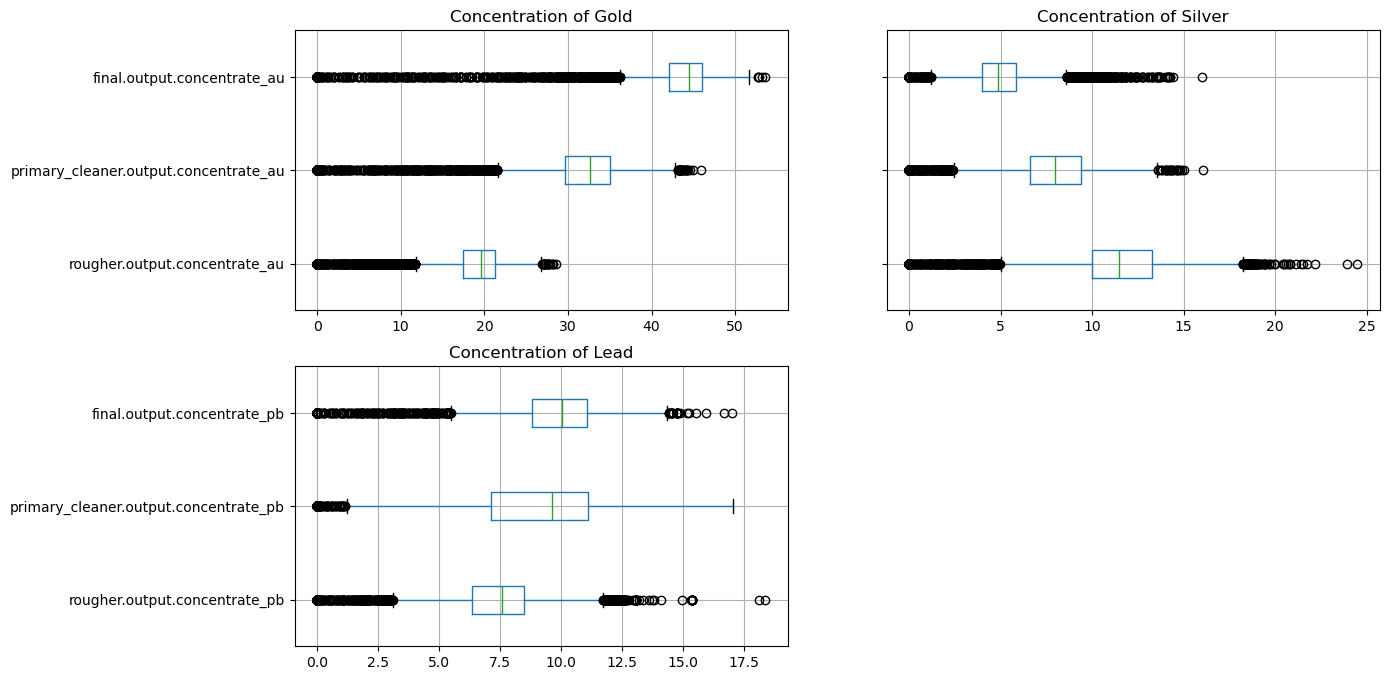

In [299]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
train[concentrate_au_stages].boxplot(ax=axes[0, 0], vert=False)
train[concentrate_ag_stages].boxplot(ax=axes[0, 1], vert=False)
train[concentrate_pb_stages].boxplot(ax=axes[1, 0], vert=False)
fig.delaxes(axes[1, 1])

axes[0, 0].set_title('Concentration of Gold')
axes[0, 1].set_title('Concentration of Silver')
axes[1, 0].set_title('Concentration of Lead')
axes[0, 1].set_yticklabels([])
axes[1, 1].set_yticklabels([])
plt.show()

Analyzing the charts:

* The concentration of gold increases as it goes through the filtering process.
* The concentration of silver diminishes as it goes through the filtering process.
* The concentration of lead (although increasing slightly), overlap in the various stages, meaning the concentration stays near the same throughout the filtering process.

### Next I will compare the feed particle size distributions in the training set and in the test set.

I will take note of the primary cleaner distributions and rougher distributions separately.

In [300]:
rougher_feed = pd.DataFrame({'Train': train['rougher.input.feed_size'], 'Test': test['rougher.input.feed_size']})
primary_feed = pd.DataFrame({'Train': train['primary_cleaner.input.feed_size'], 'Test': test['primary_cleaner.input.feed_size']})

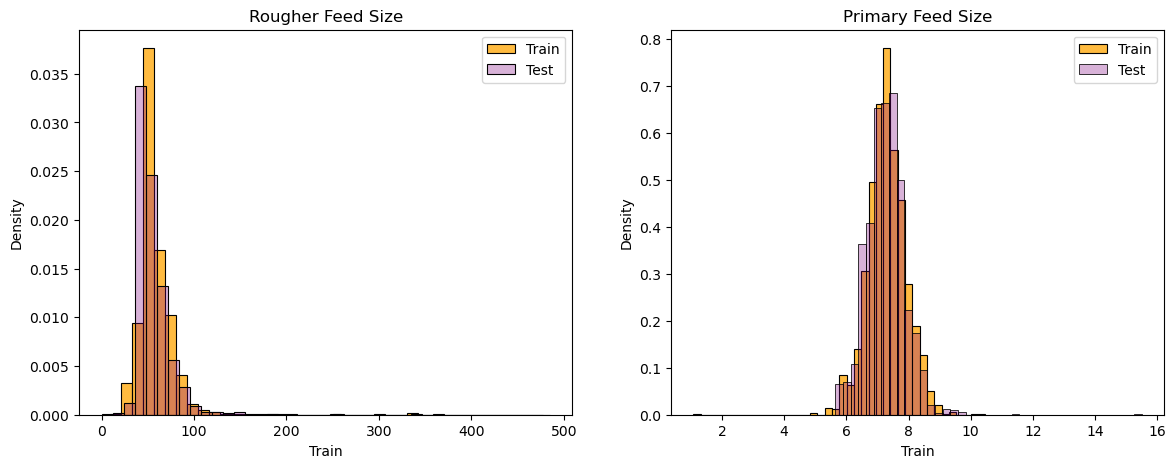

In [301]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.histplot(rougher_feed['Train'], bins=40, label="Train", color='orange', stat='density', kde=False, ax=axes[0])
sns.histplot(rougher_feed['Test'], bins=40, label="Test", color='purple', stat='density', alpha=0.3, kde=False, ax=axes[0])
sns.histplot(primary_feed['Train'], bins=40, label="Train", color='orange', stat='density', kde=False, ax=axes[1])
sns.histplot(primary_feed['Test'], bins=40, label="Test", color='purple', stat='density', alpha=0.3, kde=False, ax=axes[1])

axes[0].set_title('Rougher Feed Size')
axes[1].set_title('Primary Feed Size')
axes[0].legend()
axes[1].legend()

plt.show()

Looking at the histograms, we can see the on the rougher feed size the mean of the train set is a little more than the mean of the test set.

On the primary feed, it looks as if the means of the train and test set are similar.

I will now conduct a t_test to compare the means of the train and test sets on both the rougher and primary feed data.

---
### Consider the total concentrations of all substances at different stages: rougher input, primary purification output, rougher concentrate, and final concentrate.

### I will start with the rougher input then analyze the rougher concentrate, then analyze the primary output , then finally analyze the final concentrate.

## Rougher Input Feed

In [302]:
rougher_input = train[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb']]
rougher_input['total'] = train['rougher.input.feed_ag'] + train['rougher.input.feed_au'] + train['rougher.input.feed_pb']

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/132276164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_input['total'] = train['rougher.input.feed_ag'] + train['rougher.input.feed_au'] + train['rougher.input.feed_pb']


In [303]:
rougher_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rougher.input.feed_ag  16778 non-null  float64
 1   rougher.input.feed_au  16777 non-null  float64
 2   rougher.input.feed_pb  16632 non-null  float64
 3   total                  16631 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


In [304]:
rougher_input.duplicated().sum()

1635

In [305]:
rougher_input[rougher_input.duplicated()]

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,total
100,0.00,0.00,0.00,0.00
101,0.00,0.00,0.00,0.00
102,0.00,0.00,0.00,0.00
103,0.00,0.00,0.00,0.00
104,0.00,0.00,0.00,0.00
...,...,...,...,...
16607,0.01,0.01,0.01,0.03
16608,0.01,0.01,0.01,0.03
16609,0.01,0.01,0.01,0.03
16610,0.01,0.01,0.01,0.03


I have noticed a ton of `0` rows in which I will completely eradicate. There are also some rows with multiple duplicates. I will keep one and get rid of the others.

I decided to drop the 0's and rows with duplicate entries because there is an almost impossible chance for an instance to occur where you have the same results in consecutive samples and also low chance of you having samples with NO concentration whatsoever. So to me, this was an error and was removed from my dataframe.

In [306]:
rougher_input = rougher_input[(rougher_input != 0).any(axis=1)]
rougher_input = rougher_input.drop_duplicates(keep='first')

In [307]:
rougher_input.duplicated().sum()

0

## Rougher Concentrate

In [308]:
rougher_concentrate = train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb']]
rougher_concentrate['total'] = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_pb']

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/956926343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_concentrate['total'] = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_pb']


In [309]:
rougher_concentrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_ag  16778 non-null  float64
 1   rougher.output.concentrate_au  16778 non-null  float64
 2   rougher.output.concentrate_pb  16778 non-null  float64
 3   total                          16778 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


In [310]:
rougher_concentrate.duplicated().sum()

2044

In [311]:
rougher_concentrate[rougher_concentrate.duplicated()]

,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb,total
46,0.00,0.00,0.00,0.00
47,0.00,0.00,0.00,0.00
48,0.00,0.00,0.00,0.00
49,0.00,0.00,0.00,0.00
50,0.00,0.00,0.00,0.00
...,...,...,...,...
16610,0.01,0.01,0.01,0.03
16611,0.01,0.01,0.01,0.03
16654,0.01,0.01,0.01,0.03
16699,0.01,0.01,0.01,0.03


In [312]:
rougher_concentrate = rougher_concentrate[(rougher_concentrate != 0).any(axis=1)]
rougher_concentrate = rougher_concentrate.drop_duplicates(keep='first')

In [313]:
rougher_concentrate.duplicated().sum()

0

## Primary Purification Output

In [314]:
primary_purification = train[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb']]
primary_purification['total'] = train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_pb']

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/753979347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_purification['total'] = train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_pb']


In [315]:
primary_purification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   primary_cleaner.output.concentrate_ag  16778 non-null  float64
 1   primary_cleaner.output.concentrate_au  16778 non-null  float64
 2   primary_cleaner.output.concentrate_pb  16502 non-null  float64
 3   total                                  16502 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


In [316]:
primary_purification.duplicated().sum()

1845

In [317]:
primary_purification[primary_purification.duplicated()]

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_pb,total
22,0.00,0.00,0.00,0.00
30,0.00,0.00,0.00,0.00
73,0.00,0.00,0.00,0.00
76,0.00,0.00,0.00,0.00
91,0.00,0.00,0.00,0.00
...,...,...,...,...
16660,0.01,0.01,0.01,0.03
16661,0.01,0.01,0.01,0.03
16662,0.01,0.01,0.01,0.03
16663,0.01,0.01,0.01,0.03


In [318]:
primary_purification = primary_purification[(primary_purification != 0).any(axis=1)]
primary_purification = primary_purification.drop_duplicates(keep='first')

In [319]:
primary_purification.duplicated().sum()


0

## Final Concentrate

In [320]:
final_concentrate = train[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']]
final_concentrate['total'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_au'] + train['final.output.concentrate_pb']

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/4167831791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_concentrate['total'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_au'] + train['final.output.concentrate_pb']


In [321]:
final_concentrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   final.output.concentrate_ag  16788 non-null  float64
 1   final.output.concentrate_au  16789 non-null  float64
 2   final.output.concentrate_pb  16788 non-null  float64
 3   total                        16788 non-null  float64
dtypes: float64(4)
memory usage: 527.0 KB


In [322]:
final_concentrate.duplicated().sum()

1778

In [323]:
final_concentrate[final_concentrate.duplicated()]

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,total
100,0.00,0.00,0.00,0.00
101,0.00,0.00,0.00,0.00
102,0.00,0.00,0.00,0.00
103,0.00,0.00,0.00,0.00
104,0.00,0.00,0.00,0.00
...,...,...,...,...
16610,0.01,0.01,0.01,0.03
16611,0.01,0.01,0.01,0.03
16612,0.01,0.01,0.01,0.03
16665,0.01,0.01,0.01,0.03


In [324]:
final_concentrate = final_concentrate[(final_concentrate != 0).any(axis=1)]
final_concentrate = final_concentrate.drop_duplicates(keep='first')

In [325]:
final_concentrate.duplicated().sum()

0

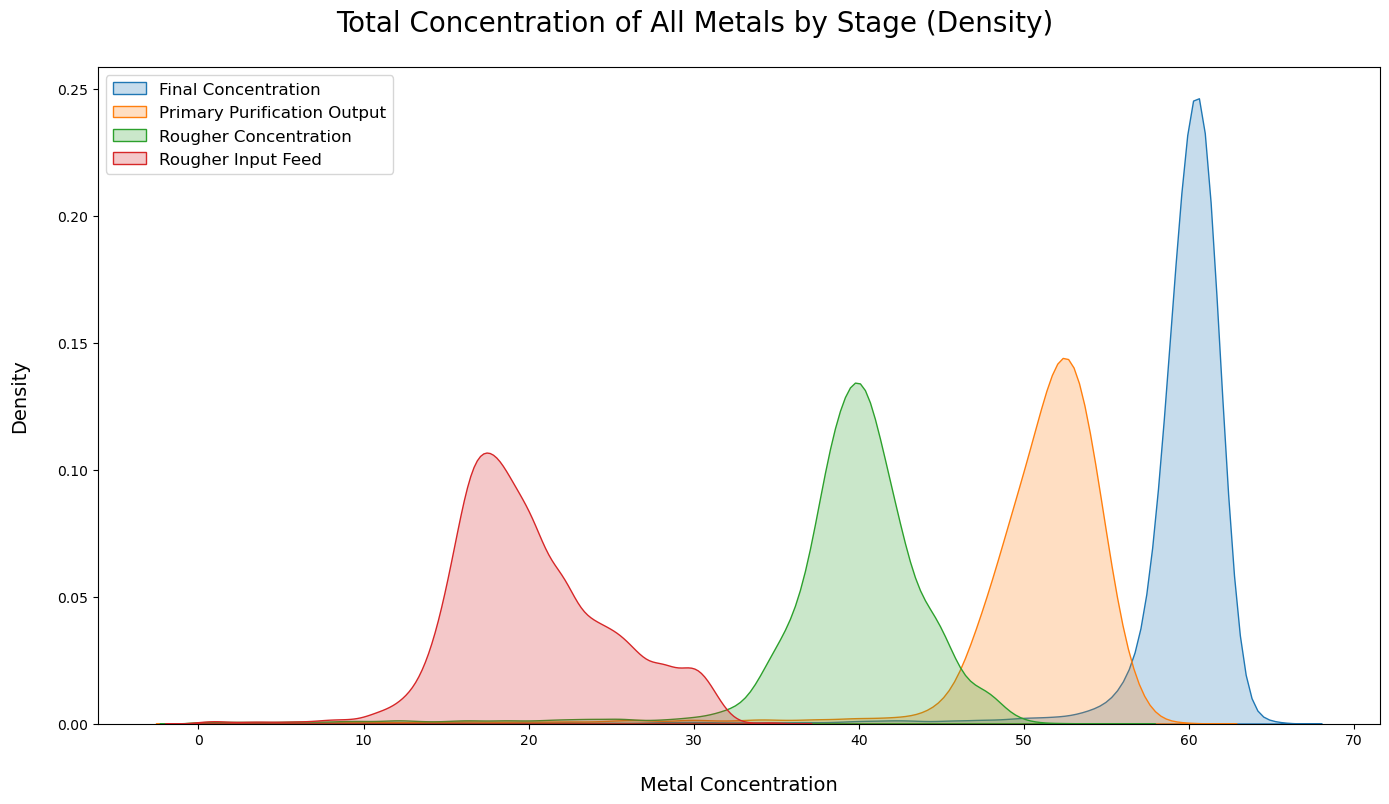

In [326]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Total Concentration of All Metals by Stage (Density)', fontsize=20, y=1)

sns.kdeplot(data=final_concentrate, x='total', label='Final Concentration', fill=True)
sns.kdeplot(data=primary_purification, x='total', label='Primary Purification Output', fill=True)
sns.kdeplot(data=rougher_concentrate, x='total', label='Rougher Concentration', fill=True)
sns.kdeplot(data=rougher_input, x='total', label='Rougher Input Feed', fill=True)

plt.legend(fontsize=12, loc='upper left')
plt.xlabel('Metal Concentration', fontsize=14, labelpad = 20)
plt.ylabel('Density', fontsize=14, labelpad=20)
    
plt.tight_layout()
plt.show()

From the data above, the concentration of all metals tends to increase throughout the process. From rougher input and output, to the primary purification it is a small increase of the concentration but from primary purification to the final concentration is when we see a large increase in the concentration of all metals. This all shows that there's less variation in the final concentration than the others.


In [327]:
different = set(full.columns) - set(train.columns)
len(different)

0

I am now going to add the target columns to the test set.

#### Test set

In [328]:
test = pd.merge(test, full[['date', 'rougher.output.recovery', 'final.output.recovery']], left_on='date', right_on='date', how='left')
test.shape

(5856, 55)

In [329]:
zero_test = (test['rougher.input.feed_ag'] == 0) | (test['rougher.input.feed_au'] == 0) | (test['rougher.input.feed_pb'] == 0)


In [330]:
test = test[~zero_test]
test.shape

(5487, 55)

In [331]:
test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                  30
primary_cleaner.input.depressant               33
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                 30
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        23
rougher.input.feed_size                        17
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate              27


In [332]:
test = test.fillna(method='ffill')

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/2417010318.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test = test.fillna(method='ffill')


<div class="alert alert-info">
Filled using `forward fill` method
</div>

#### Training set

There are 34 columns in the training set that are not in the test set. The model won't fit the test set if I keep them, so I'll delete them and keep the same features in both training and test set.

In [333]:
test_columns = test.columns
train = train[test_columns]
train.shape

(16860, 55)

In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        16860 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               15553 non-null  float64       
 2   primary_cleaner.input.depressant            15598 non-null  float64       
 3   primary_cleaner.input.feed_size             16860 non-null  float64       
 4   primary_cleaner.input.xanthate              15875 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64       
 9   primar

In [335]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5487 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5487 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5487 non-null   float64       
 2   primary_cleaner.input.depressant            5487 non-null   float64       
 3   primary_cleaner.input.feed_size             5487 non-null   float64       
 4   primary_cleaner.input.xanthate              5487 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5487 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5487 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5487 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5487 non-null   float64       
 9   primary_clean

In [336]:
zero_train = (train['rougher.input.feed_ag'] == 0) | (train['rougher.input.feed_au'] == 0) | (train['rougher.input.feed_pb'] == 0)

In [337]:
zero_train[zero_train]

99       True
100      True
101      True
102      True
103      True
         ... 
12052    True
12053    True
12054    True
12055    True
12056    True
Length: 1159, dtype: bool

No 0's in the training data set either.

### Training the rougher stage

In [338]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [339]:
rougher = ['date','rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate','rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate','rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air','rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air','rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air','rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level', 'rougher.output.recovery']

In [340]:
train_rougher = train[rougher]
test_rougher = test[rougher]
print(train_rougher.shape)
print(test_rougher.shape)

(16860, 24)
(5487, 24)


In [351]:
train_rougher = train_rougher.fillna(method='ffill')

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/1539211742.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_rougher = train_rougher.fillna(method='ffill')


In [342]:
# Splitting the data
X_train_rougher = train_rougher.drop(['date', 'rougher.output.recovery'], axis=1)
y_train_rougher = train_rougher['rougher.output.recovery']
X_test_rougher = test_rougher.drop(['date', 'rougher.output.recovery'], axis=1)
y_test_rougher = test_rougher['rougher.output.recovery']

In [343]:
def sMAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator = np.where(denominator == 0, 1e-10, denominator)

    sMAPE_values = numerator / denominator
    sMAPE = np.mean(sMAPE_values) * 100
    
    return sMAPE

In [344]:
smape_scorer = make_scorer(sMAPE)
scores = []
models = [LinearRegression(), DecisionTreeRegressor()]
model_names = ["Linear Regression", 'Decision Tree']
for model in models:
    print("The current working model is: ", model)

    scaler = StandardScaler()
    pipeline = Pipeline([('scaler', scaler), ('classifier', model)])

    score = cross_val_score(pipeline, X_train_rougher, y_train_rougher, cv=5, scoring=smape_scorer, error_score='raise')
    scores.append(np.mean(score))
scores_df = pd.DataFrame({'model': model_names, 'score': scores})
scores_df.T

The current working model is:  LinearRegression()
The current working model is:  DecisionTreeRegressor()


,0,1
model,Linear Regression,Decision Tree
score,19.256135,24.290776


We can see that based on the metric of sMAPE, the best the model in this stage is the linear regression, therefore I will use this model to generate the prodiction of the `rougher.output.recovery` and replace the original one in order to train the next model.

In [345]:
model = LinearRegression()
model = model.fit(X_train_rougher, y_train_rougher)
rougher_output_recovery_train_pred = model.predict(X_train_rougher)
rougher_output_recovery_test_pred = model.predict(X_test_rougher)

### Sanity check model

In [346]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr = dummy_regr.fit(X_train_rougher, y_train_rougher)
dummy_rougher_test_pred = dummy_regr.predict(X_test_rougher)

### Training the final stage

In [357]:
train_final = train
test_final = test

train_final = train_final.fillna(method='ffill')

train_final['rougher.output.recovery'] = rougher_output_recovery_train_pred
test_final['rougher.output.recovery'] = rougher_output_recovery_test_pred


X_train_final = train_final.drop(['date','final.output.recovery'], axis=1)
y_train_final = train_final['final.output.recovery']
X_test_final = test_final.drop(['date','final.output.recovery'], axis=1)
y_test_final = test_final['final.output.recovery']

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_33271/1059194849.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_final = train_final.fillna(method='ffill')


In [358]:
scores = []
models = [LinearRegression(), DecisionTreeRegressor()]
model_names = ['Linear Regression', 'Decision Tree']
for model in models: 
    print("The current working model is: ", model)
    scaler = StandardScaler()
    pipeline = Pipeline([('scaler', scaler), ('classifier', model)])
    score = cross_val_score(model, X_train_final, y_train_final, cv=5, scoring=smape_scorer, error_score='raise')
    scores.append(np.mean(score))
scores_df = pd.DataFrame({'model': model_names, 'score': scores})
scores_df.T

The current working model is:  LinearRegression()
The current working model is:  DecisionTreeRegressor()


,0,1
model,Linear Regression,Decision Tree
score,15.722898,28.847893


### Calculating the score of the rougher stage

In [362]:
score_rougher = sMAPE(y_test_rougher, rougher_output_recovery_test_pred)
score_rougher

10.067743840848923

In [361]:
control_group_score_rougher = sMAPE(y_test_rougher, dummy_rougher_test_pred)
control_group_score_rougher

13.019187512808958

### Calculating the score of the final stage

#### Actual data

In [363]:
model = LinearRegression()
model = model.fit(X_train_final, y_train_final)
y_test_pred_final = model.predict(X_test_final)
score_final = sMAPE(y_test_final, y_test_pred_final)

#### Control group

In [364]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr = dummy_regr.fit(X_train_final, y_train_final)
dummy_final_test_pred = dummy_regr.predict(X_test_final)
contro_group_score_final = sMAPE(y_test_final, dummy_final_test_pred)

### Calculating the combined score

$$
\text{Final sMAPE} = 25\% \times \text{sMAPE}_{\text{rougher}} + 75\% \times \text{sMAPE}_{\text{final}}
$$

#### Actual data

In [365]:
combined_score = 0.25 * score_rougher + 0.75 * score_final
print(combined_score)

10.717812097158394


#### Control group

In [366]:
control_group_combined_score = 0.25 * control_group_score_rougher + 0.75 * contro_group_score_final
print(control_group_combined_score)

11.977787507877565


## Conclusion

I have completed a number of things in this project:

* I have prepared the data

So in previous projects we only had one target, whereas in this project we had two. Also, unlike previous projects which provide a single dataset, this project provided us a train set and a test set, and they are different in features.

* I analyzed the data

I proposed a hypothesis and used a t-test to see if they had similar mean values or distributions.

* I built the model and calculated the sMAPE score

Once calculated it showed us that the sMAPE score did do well enough in the model.

